In [1]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import os
import cv2
import time
import argparse
import multiprocessing
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# CWD_PATH = 'D:\\raccoon_dataset-master\\training'
CWD_PATH = 'D:\\datastore\\test_object_detection'
PATH_TO_CKPT = os.path.join(CWD_PATH, 'graph','frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(CWD_PATH, 'object-detection.pbtxt')

In [4]:
PATH_TO_CKPT = os.path.join(os.path.pardir, 'savedmodel','frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(os.path.pardir, '1_label_map.pbtxt')

In [5]:
NUM_CLASSES = 2

# Loading label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [24]:
def detect_objects(image_np, sess, detection_graph):
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

    # Each box represents a part of the image where a particular object was detected.
    boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    scores = detection_graph.get_tensor_by_name('detection_scores:0')
    classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')

    # Actual detection.
    (boxes, scores, classes, num_detections) = sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})
    print(np.squeeze(boxes))
    print(np.squeeze(scores))
#     print(boxes, scores, classes, num_detections) # 打印
#     print(boxes[0].shape)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        max_boxes_to_draw=20,
        use_normalized_coordinates=True,
        line_thickness=8)
    return image_np

In [19]:
# First test on images
# PATH_TO_TEST_IMAGES_DIR = 'D:\\raccoon_dataset-master\\images'
# PATH_TO_TEST_IMAGES_DIR = os.path.join(CWD_PATH,'test')
# # TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'raccoon-{}.jpg'.format(i)) for i in range(1, 3) ]
# TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR,name) \
#                     for name in os.listdir(PATH_TO_TEST_IMAGES_DIR)[:5]]

# Size, in inches, of the output images.
import glob
TEST_IMAGE_PATHS = glob.glob(os.path.join(os.path.pardir, 'img','*.jpg'))
IMAGE_SIZE = (12, 8)

In [20]:
# np.random.shuffle(TEST_IMAGE_PATHS)
TEST_IMAGE_PATHS = TEST_IMAGE_PATHS[:5]
TEST_IMAGE_PATHS

['..\\img\\1.jpg',
 '..\\img\\13411917471020180111155352087_陈永辉 _2.jpg',
 '..\\img\\13411939085020180116152350157_陈锐荣_2.jpg',
 '..\\img\\13411958333020180128105225056_许娟文_3.jpg',
 '..\\img\\13411964121020180117211650213_楚玉莹_2.jpg']

In [13]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    print(image.size,np.array(image.getdata()).shape)
    return np.array(image.getdata())[:,:3].reshape(
        (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
from PIL import Image
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    image_np = load_image_into_numpy_array(image)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
#     print(image.size, image_np.shape)

In [14]:
#Load a frozen TF model 
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

(300, 300) (90000, 3)
[[0.64250225 0.40124094 0.80541974 0.7643602 ]
 [0.37406677 0.05369565 0.66961414 0.41226286]
 [0.821934   0.4382773  0.98953605 0.9923112 ]
 [0.10976398 0.         0.38241163 0.35080755]
 [0.06641464 0.         0.46890682 0.16551623]
 [0.81687766 0.01915713 0.99463457 0.49648064]
 [0.37104774 0.6512292  0.5187336  0.9962165 ]
 [0.7680942  0.94031423 0.89939773 0.99866194]
 [0.02371206 0.         0.23790264 0.35776293]
 [0.         0.         0.4871127  0.29136175]
 [0.09820077 0.45013803 0.5394143  0.91615444]
 [0.5736653  0.8146259  0.66046613 0.99275285]
 [0.529431   0.41240975 0.58237374 0.5911151 ]
 [0.36664253 0.7447468  1.         0.99621224]
 [0.11880141 0.         0.7719897  1.        ]
 [0.31719998 0.6147509  0.52066714 0.8141939 ]
 [0.         0.59196264 0.3641771  1.        ]
 [0.14926593 0.6434967  0.5913809  1.        ]
 [0.         0.22039112 0.5809283  0.84196067]
 [0.         0.23484594 0.49758333 0.7679108 ]
 [0.51391906 0.46371982 0.96886533 0.6

(300, 300) (90000, 3)
[[0.12701964 0.12941721 0.786631   0.75219464]
 [0.27014315 0.24018532 0.7823347  0.85036844]
 [0.22775236 0.36650115 0.81612515 0.97699887]
 [0.18042693 0.07466619 0.7323599  0.5715232 ]
 [0.09018213 0.3745191  1.         0.6701422 ]
 [0.29464328 0.0948008  0.6703294  1.        ]
 [0.2009898  0.01622939 0.50861424 0.5897875 ]
 [0.8444889  0.00597551 0.99526983 0.44860718]
 [0.2691506  0.5589641  0.9242841  0.97209114]
 [0.27942353 0.73539174 0.7969845  0.9791657 ]
 [0.17522216 0.30441862 0.7535134  0.6794412 ]
 [0.         0.         0.8728625  1.        ]
 [0.44360036 0.38204774 0.8602783  0.9776232 ]
 [0.09018213 0.3745191  1.         0.6701422 ]
 [0.29464328 0.0948008  0.6703294  1.        ]
 [0.20182449 0.         0.8508629  1.        ]
 [0.05487189 0.5105894  0.7112086  0.8724306 ]
 [0.20787078 0.22931606 0.7662994  0.813646  ]
 [0.         0.10263145 1.         0.84894645]
 [0.         0.14123374 0.76868665 0.48986453]
 [0.53482664 0.20988807 0.8256707  0.8

[[0.179447   0.05830885 0.8090692  0.550506  ]
 [0.18252477 0.36286741 0.8859489  0.9540517 ]
 [0.17248654 0.16529605 0.7781976  0.7604157 ]
 [0.0661968  0.0386768  0.6659891  0.5901219 ]
 [0.06163958 0.26194504 0.92955947 0.7806268 ]
 [0.44520062 0.36695638 0.86966974 0.99053085]
 [0.08335379 0.36909977 1.         0.68500173]
 [0.32010886 0.47161666 1.         1.        ]
 [0.12762952 0.5864025  0.899063   0.9998881 ]
 [0.29552907 0.19620848 0.6804168  1.        ]
 [0.23501399 0.0203505  0.72615993 0.2930414 ]
 [0.         0.         0.8862962  0.9754631 ]
 [0.29552907 0.19620848 0.6804168  1.        ]
 [0.27882    0.05932368 0.7374122  0.4111247 ]
 [0.20226994 0.         0.7387043  1.        ]
 [0.17602946 0.         0.49570018 0.5626147 ]
 [0.30004656 0.04499555 0.67756677 0.6967074 ]
 [0.11048251 0.4969483  0.75528055 0.8628809 ]
 [0.18651152 0.2834775  0.85719705 0.8738418 ]
 [0.10477611 0.07543734 0.9200864  0.32486692]
 [0.         0.44959205 0.44245252 1.        ]
 [0.20226994 

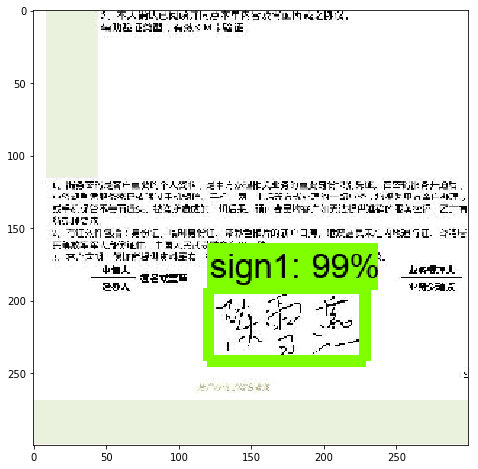

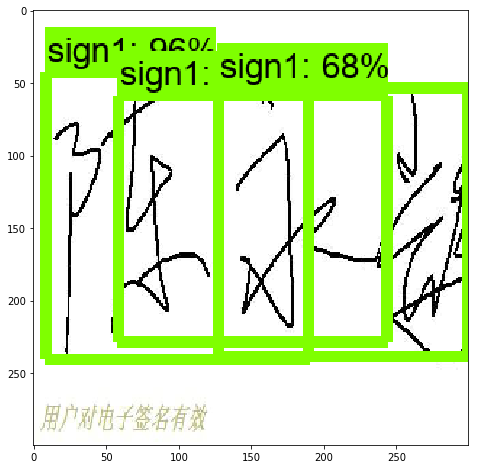

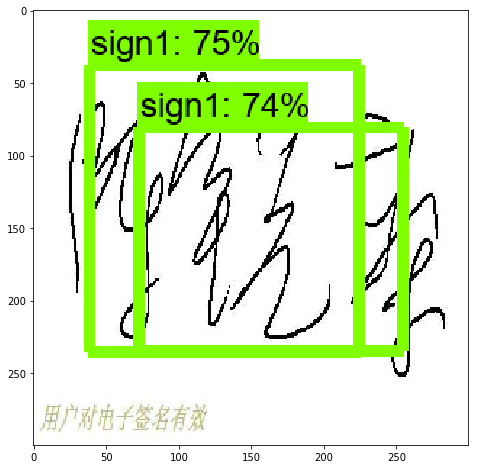

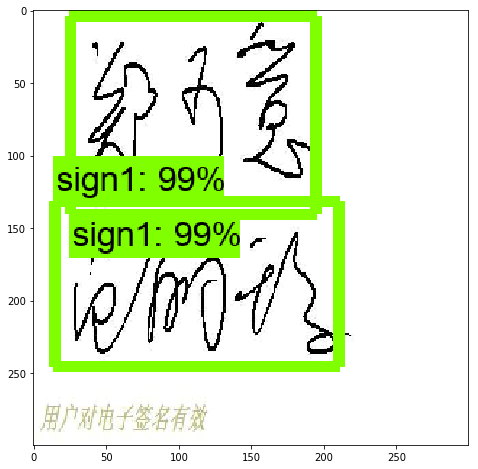

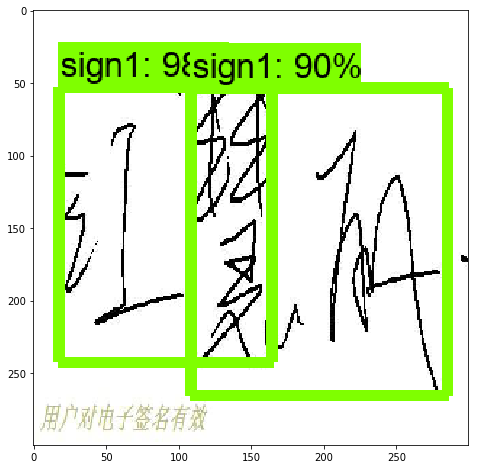

In [25]:
from PIL import Image
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path).resize((300,300))
#             image = image.convert('L')
#             data = np.array(image)
#             data[data < 160] = 0
#             data[data > 160] = 255
#             image = Image.fromarray(data)
#             image = image.convert('RGB')
            image_np = load_image_into_numpy_array(image)
            image_process = detect_objects(image_np, sess, detection_graph)
            print(image_process.shape)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_process)

In [ ]:
# test
name = os.path.join(os.path.pardir,'6_2.jpg')
# name = os.path.join(os.path.pardir,'4.jpg')

img = Image.open(name)
img = img.convert('L')
data = np.array(img)
data[data < 160] = 0
data[data > 160] = 255

img = Image.fromarray(data)
img = img.convert('RGB')

print(data.shape)
img

In [ ]:
import matplotlib.cm as cm
data[data > 100] = 255
plt.imshow(data, cmap=cm.gray)
plt.show()

In [ ]:
a = np.arange(9)
a = a.reshape(3,3)
a[a > 2] = 6
a